In [1]:
import qiskit
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister
import pandas as pd
import numpy as np
import copy
from sklearn import model_selection, datasets, svm
import matplotlib.pyplot as plt

In [2]:
d = datasets.load_iris()
X = d.data
Y = d.target

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=42)

In [3]:
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
pd.DataFrame(Y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
print(Y_train)

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


In [6]:
print(X_train)

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.

In [7]:
N = 4

In [8]:
def feature_map(X):
    q = QuantumRegister(N)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q,c)
    
    for i, x in enumerate(X):
        qc.rx(x,i)
    return qc, c

In [9]:
def variational_circuit(qc, theta):
    for i in range(N-1):
        qc.cnot(i, i+1)
    qc.cnot(N-1, 0)
    for i in range(N):
        qc.ry(theta[i],i)
    return qc

{'0': 5319, '1': 4681}
0.5319


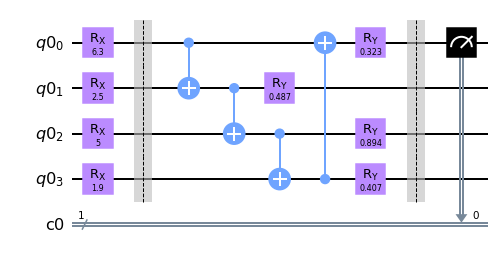

In [10]:
qc, c = feature_map(X_train[5])
qc.barrier()
qc = variational_circuit(qc, np.random.rand(N))
qc.barrier()
qc.measure(0, c)

shots = 1E4
backend = Aer.get_backend('qasm_simulator')
job = qiskit.execute(qc, backend, shots = shots)
result = job.result()
counts = result.get_counts(qc)
print(counts)
print(counts['0']/shots)

qc.draw('mpl')

In [11]:
def quantum_nn(X, theta, simulator=True):

    qc, c = feature_map(X)
    qc = variational_circuit(qc, theta)
    qc.measure(0, c)
    shots = 1E4
    backend = Aer.get_backend('qasm_simulator')
    
    if simulator == False:
        
        shots = 5000
        provider = IBMQ.load_account()
        backend = provider.get_backend('ibmq_qasm_simulator')
    
    job = qiskit.execute(qc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    
    return counts['1']/shots

In [12]:
def loss(prediction, target):
    return (prediction - target)**2

In [13]:
def gradient(X, Y, theta):
    delta = 0.01
    grad = []
    for i in range(len(theta)):
        dtheta = copy.copy(theta)
        dtheta[i] += delta
        pred1 = quantum_nn(X, dtheta)
        pred2 = quantum_nn(X, theta)
        
        grad.append((loss(pred1,Y) - loss(pred2,Y)) / delta)
    
    return np.array(grad)

In [14]:
def accuracy(X, Y, theta):
    
    counter = 0
    for X_i, Y_i in zip(X, Y): 
        
        prediction = quantum_nn(X_i, theta)
        if prediction < 0.5 and Y_i == 0:
            counter += 1
        elif prediction >= 0.5 and Y_i == 1:
            counter += 1
            
    return counter/len(Y)

In [15]:
eta = 0.05
loss_list = []
theta = np.ones(N)

print('Epoch \t Loss (in %) \t Training Accuracy (in %)')

for i in range(20):
    
    loss_tmp = []

    for X_i, Y_i in zip(X_train, Y_train):
        prediction = quantum_nn(X_i, theta)
        loss_tmp.append(loss(prediction, Y_i))

        #update theta
        theta = theta - eta * gradient(X_i, Y_i, theta)
    
    loss_list.append(np.mean(loss_tmp))
    acc = accuracy(X_train, Y_train, theta)
    
    print(f'{i} \t {loss_list[-1]*100:.3f} \t {acc*100:.3f}')

Epoch 	 Loss (in %) 	 Training Accuracy (in %)
0 	 94.610 	 56.667
1 	 83.339 	 55.833
2 	 84.539 	 56.667
3 	 76.006 	 56.667
4 	 76.838 	 55.000
5 	 76.094 	 57.500
6 	 75.027 	 56.667
7 	 75.115 	 55.000
8 	 75.917 	 55.833
9 	 75.646 	 55.833
10 	 76.160 	 55.000
11 	 76.675 	 55.000
12 	 76.200 	 56.667
13 	 77.776 	 54.167
14 	 84.928 	 58.333
15 	 78.709 	 57.500
16 	 75.468 	 55.833
17 	 75.440 	 56.667
18 	 75.907 	 55.833
19 	 76.146 	 57.500


<function matplotlib.pyplot.show(close=None, block=None)>

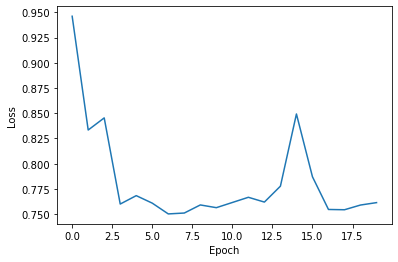

In [16]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show

In [17]:
accuracy(X_test, Y_test, theta)

0.43333333333333335

In [18]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [19]:
print(clf.predict(X_test))
print(Y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
